# **행복 지수가 높은 나라들은 잘 사는 나라일까?**

국가별(총 149개의 국가)의 각종 데이터(GDP, 기대 수명, 삶의 자유도, 부정부패, 관용, 사회적 지원)와 국민들이 응답한 주관적인 행복지수 간의 상관관계를 알아본다.

---


## 역할
- 30504 김제유 : 데이터 분석, 보고서 작성
- 30615 이종우 : 데이터 분석, 보고서 작성

## 목차
- 문제 정의

- 데이터 전처리
 - 데이터 정의
 - pandas를 이용한 데이터 전처리

- 표현 방법 설계

- 구현
 - 구현 방법
 - 구현 내용
 - 오류 발견 및 수정

- 결과 분석

- 느낀 점

- 출처


### 문제 정의
 - 빅데이터 수행평가로 kaggle에서 다양한 데이터를 찾던 도중, 우리 조에서는 다양한 측면에서 연구해 볼 수 있고, 많은 데이터를 가진 <국가별 행복 지수> 데이터에 관심을 가지게 되었다. 그래서, 이 데이터를 활용하고 분석할 수 있는 프로젝트를 기획하고 실행하게 되었다.
 - 메인 주제는 <국가별 행복 지수와 GDP 간에는 어떤 관계가 있을까?> 이고, 이와 관련된 주제로 <각종 데이터(GDP, 기대 수명, 삶의 자유도, 부정부패, 관용, 사회적 지원)와 행복지수 간의 상관관계>를 알아보도록 하겠다.
 - 또한, 각종 데이터를 모두 조합해 데이터 간의 유의미한 연관성을 발견할 수 있도록 하고자 하였다. 

### 데이터 전처리
 - 각 Column에 해당하는 데이터의 의미를 알아본다.

굵은 텍스트 - Country Name : 국가 이름
 - Regional Indicator : 대륙 구분
 - ladder score : 0~10까지 자신의 삶에 대한 만족도 점수
 - Standard error of ladder score : ladder score의 표준 오류(표준 오차는 통계의 표본 분포의 표준 편차이다.)
 - upper whisker : 상위 25%의 값
 - lower whisker : 하위 25%의 값
 - Logged GDP per capita : 1인당 GDP 로그 값
 - Healthy life expectancy : 건강 수명(장애 없이 살아갈 수 있는 기대 수명)
 - Freedom to make life choices : 삶의 선택 (의사 결정) 자유도
 - Generosity : 관대함
 - Perceptions of corruption : 부정부패 인식 정도
 - Ladder score in Dystopia : 최악의 상황에서의 ladder score
 - Explained by (?) : 잘모르겠음

In [ ]:
# 필요한 라이브러리

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
world_happiness_df = pd.read_csv('/content/drive/MyDrive/data/world-happiness-report-2021.csv')
world_happiness_df.head(3)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839


In [ ]:
print(world_happiness_df.isnull().sum())

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64


결손값이 없는 완전한 데이터이다.

In [ ]:
print(world_happiness_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

국가 이름과 대륙은 텍스트로, 나머지는 실수형태로 표현되어 있다.

In [ ]:
print(world_happiness_df['Regional indicator'].value_counts())

Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64


대륙은 사하라 이남 아프리카, 서유럽, 카리브 제도, 중부와 동부 유럽, 중동과 북아프리카, 독립국가연합, 동아시아, 남아시아, 서아시아, 북아메리카와 호주와 뉴질랜드로 구분되어 있다.

In [ ]:
world_happiness_df.drop([
                         'Standard error of ladder score', 
                         'upperwhisker', 
                         'lowerwhisker', 
                         'Ladder score in Dystopia', 
                         'Explained by: Log GDP per capita', 
                         'Explained by: Log GDP per capita', 
                         'Explained by: Social support', 
                         'Explained by: Healthy life expectancy', 
                         'Explained by: Freedom to make life choices', 
                         'Explained by: Generosity', 
                         'Explained by: Perceptions of corruption', 
                         'Dystopia + residual'
                         ], axis=1, inplace=True)
world_happiness_df.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


그 나라의 국민들이 주관적으로 응답한 점수(Ladder Score)와 그 나라와 직접적으로 연관된 데이터 6가지를 제외하고 전부 drop(제거) 한다.

In [ ]:
world_happiness_df.shape

(149, 9)

최종적인 형태는 다음과 같다. (149개 행, 9개 열)

### 표현 방법 설계
값들 사이의 관계를 한눈에 알아볼 수 있도록 산점도 그래프를 그린다.

### 구현
seaborn 라이브러리를 이용해 x축과 y축에 값을 각각 대입해 짝지어서 볼 수 있는 pairplot을 이용해 구현한다.

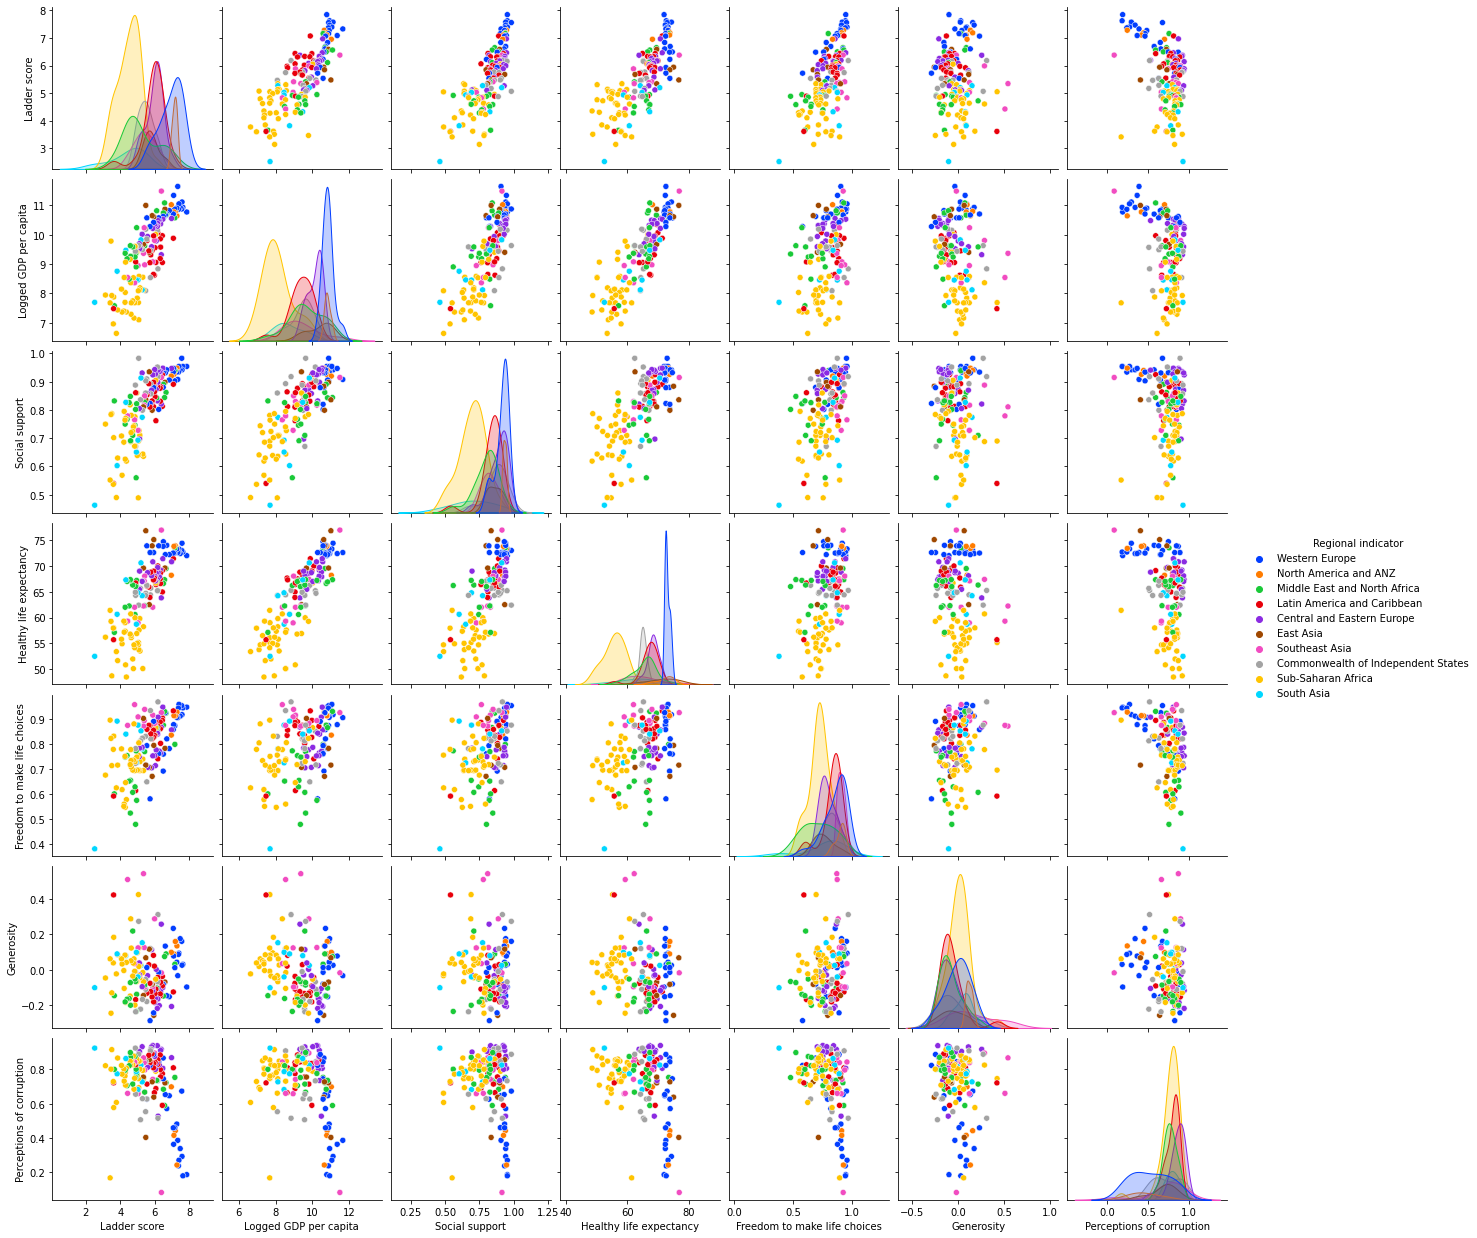

In [ ]:
sns.pairplot(world_happiness_df, diag_kind='kde', hue='Regional indicator', palette='bright')
plt.show()

# 오류 발견 및 수정
키 값을 써줄 때 (ex: Regional indicator) 대소문자 구분을 정확히 해줘야 한다는 것을 알게되었다. 그렇지 않으면 KeyError가 발생한다.

### 결과 분석
 - 맨 왼쪽 열(Ladder score와 다른 값들의 관계)를 살펴볼 것이다.

1. Ladder score와 1인당 GDP 그래프를 보면 점들이 일정하게 우측 상단으로 향해가는 것을 볼 수 있다. 1인당 GDP가 높은 국가들의 국민들은 대체로 행복한 삶을 산다고 생각하고 있는 것 같다.

2. 마찬가지로 Social Support와 Ladder score 그래프를 보면 점들이 모여 우상향 그래프를 그리고 있다. 서로 사회적으로 많은 지원을 주고받는 나라의 사람들이 행복한 삶을 사는 것 같다.

3. 건강 수명과 Ladder score의 그래프에서도 우상향 그래프를 확인할 수 있다. 건강하게 오래 사는 나라의 사람들은 대체로 행복한 삶을 살고 있다고 응답했다.

4. 삶의 자유도와 Ladder score의 그래프에서는 좀 다른 모양이 발견된다. 점들의 색이 일정하지 않고 퍼져있다. 삶이 자유롭지만 행복하지 않고, 삶이 제한적이지만 행복한 사람들의 경우도 있는 것 같다. 자유로움은 삶의 행복과 그렇게 큰 연관성을 가지지 않는 것 같다.

5. 관대함과 Ladder score의 그래프에서도 특별한 모양 없이 점들이 퍼져있다. 조금 쪼잔하거나 옹졸한 사람이더라도 혼자 행복하게 살 수 있는 것 같다.

6. 부정부패 정도와 Ladder score의 그래프에서는 어느 정도 예상한 모양이었다. 실제로 부정부패가 많이 행해지는 나라(아프리카, 동남아시아)들은 y축에서 높은 값을 기록했고, 행복도는 중하위 정도의 수치를 응답했다. 하지만 유럽의 경우에는 부정부패 정도가 다양한데 대체로 높은 행복도를 기록하고 있는 것으로 봐서 각 나라 정부 성향의 차이를 확인할 수 있었다. 국민들의 삶에 직접적으로 영향을 주는 무력 독재(아프리카, 동남아 등) 그리고 국민들 몰래 행해지는 정치인들간의 비리(유럽권 국가)는 국민들의 행복도에 서로 다른 영향을 주는 것 같다.


- 최적의 표현 방법
 - 구현 및 결과 분석 단계에서 살펴본 것과 같이, 산점도 그래프를 통해 표현하는 것이 표현하고자 하는 바를 가장 잘 표현할 수 있었다.




### 느낀 점
- 김제유 : 조사 과정에서 다양한 데이터를 접해 보고, 우리 생활에서 생각보다 많은 데이터들이 기록되고 있다는 것을 알게 되었다. 또, 데이터를 분석하면서 대륙 구분을 5대륙(호주, 뉴질랜드는 임의로 지정)으로 나눴다면 산점도 그래프에서 점의 색을 보다 정확하게 보고 판단할 수 있었을 것 같단 생각을 했다. 다음엔 더 대용량의 데이터를 분석해 보고 싶다.
- 이종우 : 빅데이터 수업 및 프로젝트를 통해 데이터의 분석 능력과 프로그래밍 능력을 기를 수 있었고, 간단한 과정을 통해 생활 속에서 발생하는 데이터를 분석해 볼 수 있겠다는 생각을 가지게 되었다. 기회가 된다면 이러한 프로젝트를 또 하고 싶다.

### 출처
 - kaggle
 - World Happiness Report 2021
